# 09_ SAGs_MAGs_Comparison

This document compares both hosts and viruses from SAGs and MAGs.

In [3]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

phyla_color = ['lightgreen', 'mediumseagreen', 'c', 'cadetblue', 'mediumpurple', 'plum', 'lightsalmon', 'orange', 'goldenrod', 'tan']
phyla_list = ['Acidobacteriota', 'Chloroflexota', 'Cyanobacteriota', 'Marinisomatota', 'Patescibacteria', 'Planctomycetota', 'Proteobacteria', 'Pseudomonadota',
              'SAR324', 'Thermoplasmatota']
phyla_color_map = dict(zip(phyla_list, phyla_color))

class_color = ['hotpink','r', 'crimson', 'darkred', 'chocolate', 'brown', 'rosybrown', 'mediumvioletred', 'pink', 'violet', 'lightgrey', 'dimgrey']
class_list = ['ABY1', 'Acidimicrobiia', 'Alphaproteobacteria', 'Cyanobacteriia', 'Dehalococcoidia', 'Gammaproteobacteria', 'Marinisomatia', 'Paceibacteria',
              'Planctomycetia', 'Poseidoniia', 'SAR324', 'Vicinamibacteria']
class_color_map = dict(zip(class_list, class_color))

order_color = ['lightskyblue', 'steelblue', 'dodgerblue', 'forestgreen', 'limegreen', 'darkolivegreen', 'mediumslateblue', 'saddlebrown', 'orchid',
               'lightslategray', 'yellowgreen', 'turquoise', 'teal']
order_list = ['Acidimicrobiales', 'Arenicellales', 'HIMB59', 'Marinisomatales', 'Nitrososphaerales', 'PCC-6307', 'Pelagibacterales', 'Phycisphaerales',
              'Pirellulales', 'SCGC-AAA003-L08', 'UBA11654', 'Verrucomicrobiales', 'Vicinamibacterales']
order_color_map = dict(zip(order_list, order_color))

sags = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/sag_data/MPsag_mx2_proximeta_matches_gtdbtk.csv')

sags_virus = pd.read_csv("~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/sag_data/MPvsag_info_230818.csv")
sags.rename(columns={'classification_via_GTDBTk': 'classification'}, inplace=True) # rename classification column

# split the classification into tax level columns and rename
sags[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=sags.classification.str.split(';', expand=True)
sags['domain'] = sags['domain'].str.replace('d__', '') # remove the d__ in front of all observations
sags['phyla'] = sags['phyla'].str.replace('p__', '')
sags['class'] = sags['class'].str.replace('c__', '')
sags['order'] = sags['order'].str.replace('o__', '')
sags['family'] = sags['family'].str.replace('f__', '')
sags['genus'] = sags['genus'].str.replace('g__', '')
sags['species'] = sags['species'].str.replace('s__', '')

mags = pd.read_csv('/Users/melissaherring/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/mag_data/all_mag_gtdb.csv')

vMAGs = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/proximeta_viral_files/vMAG_associations.csv')

## SAGs vs MAGs- hosts

Text(0.5, 1.0, 'Top 10 Most Abundant Orders in MAGs')

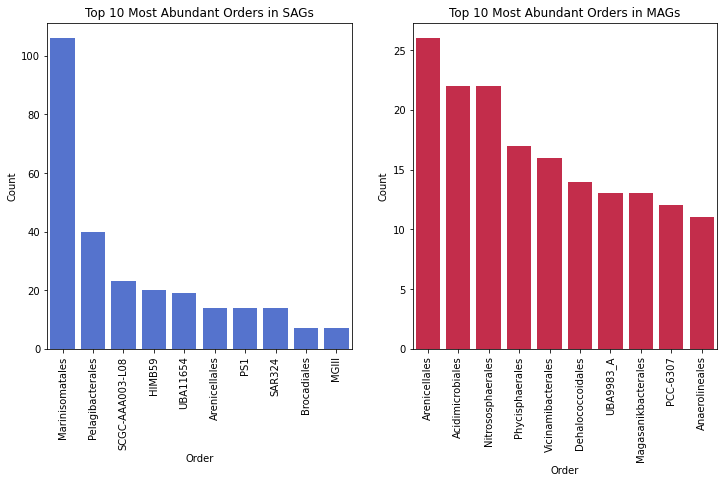

In [4]:
sag_order = sags.groupby('order', as_index=False)['well'].count().sort_values(by = 'well',ascending=False)
top_sag = sag_order [:10]

mag_order = mags.groupby('order', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_mag = mag_order [:10]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'order', y= 'well', data = top_sag, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Order')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Orders in SAGs')

sns.barplot(x = 'order', y= 'user_genome', data = top_mag, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Order')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Orders in MAGs')

/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_12339/1238039907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sag.rename(columns={'well': 'count'},inplace=True)
/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_12339/1238039907.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_mag.rename(columns={'user_genome': 'count'},inplace=True)
/var/folders/bk/x0sqx4rn5mzdg48mb24q8g2r0000gn/T/ipykernel_12339/1238039907.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

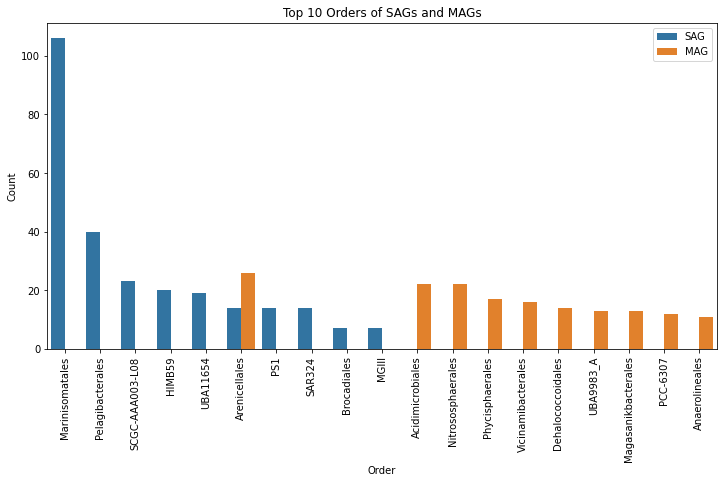

In [5]:
# Grouped Bar plot
sag_order = sags.groupby('order', as_index=False)['well'].count().sort_values(by = 'well',ascending=False)
top_sag = sag_order [:10]
top_sag.rename(columns={'well': 'count'},inplace=True)

mag_order = mags.groupby('order', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_mag = mag_order [:10]
top_mag.rename(columns={'user_genome': 'count'},inplace=True)

top_sag['group'] = 'SAG'
top_mag['group'] = 'MAG'
grouped = pd.concat([top_sag,top_mag])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.barplot(x="order", y="count", hue="group", data=grouped).tick_params(axis='x', rotation=90)
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Top 10 Orders of SAGs and MAGs')
plt.legend(title='')


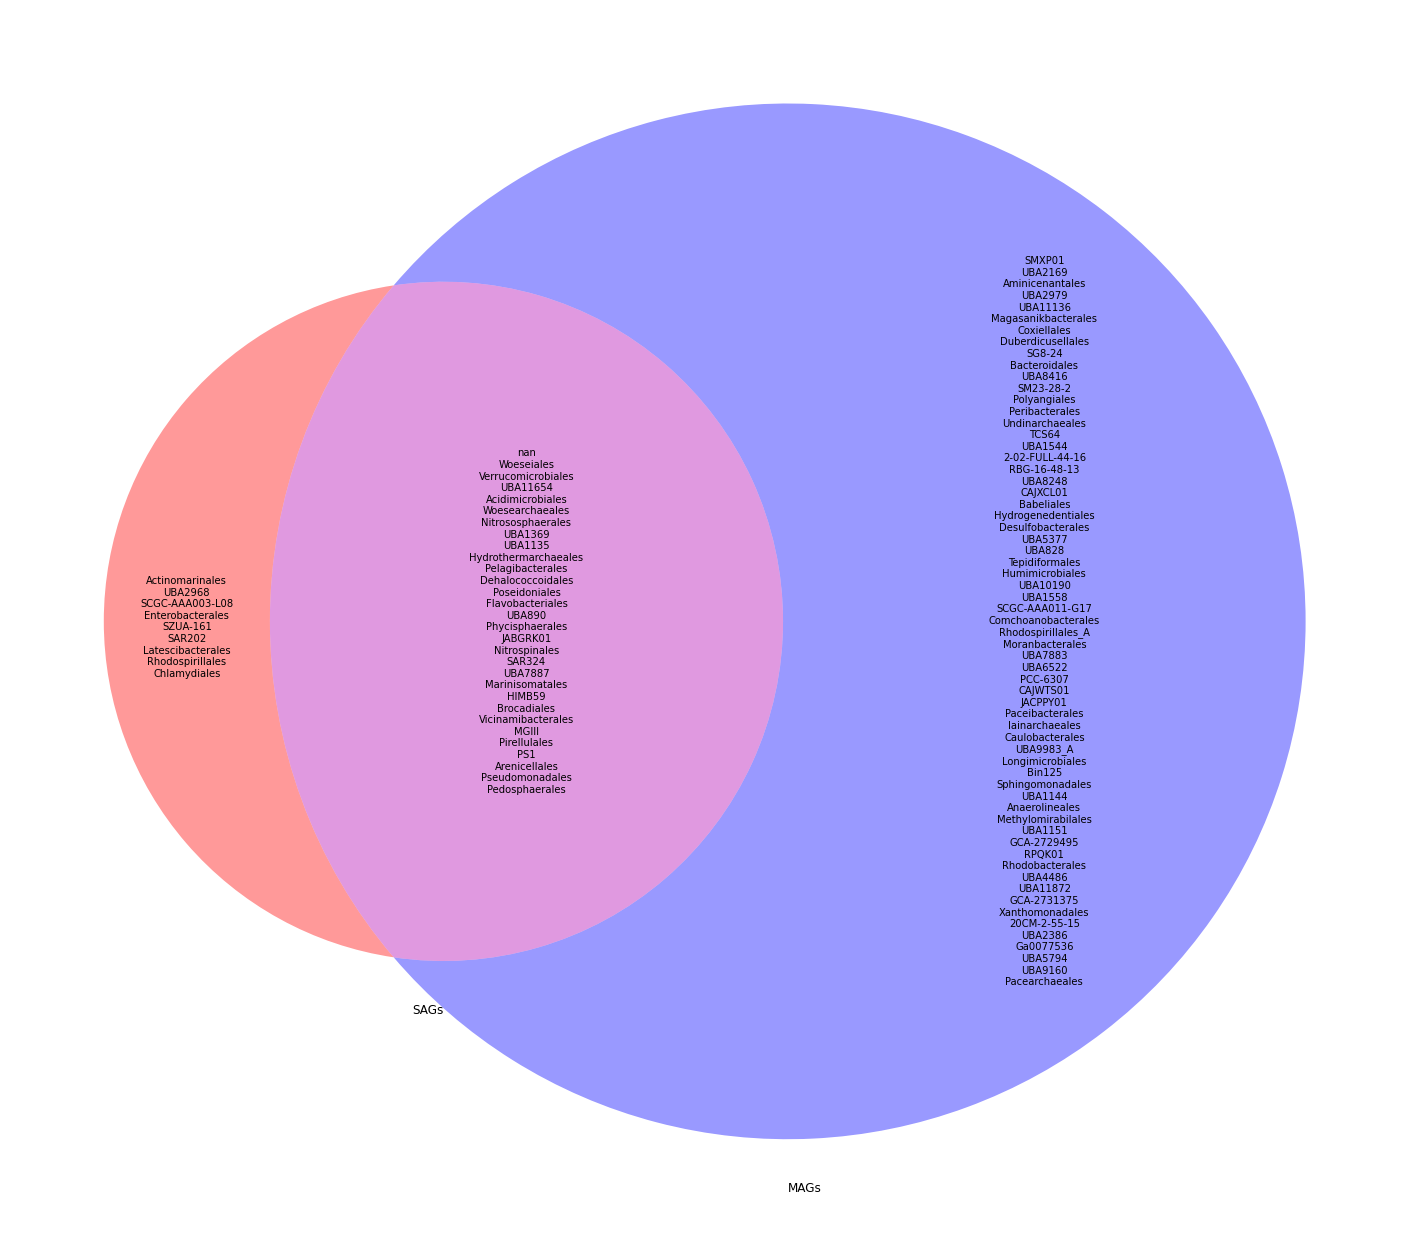

In [6]:
# venn diagram

sags_clean = sags
sags_clean['order'] = sags['order'].dropna()
mags_clean = mags
mags_clean['order'] = mags['order'].dropna()


set_A = set(sags_clean['order'])
set_B = set(mags_clean['order'])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

# Create the Venn diagram
venn = venn2([set_A, set_B], ('SAGs', 'MAGs'),set_colors=('red', 'blue'))

# Annotate the circles with values
venn.get_label_by_id('10').set_text('\n'.join(map(str,set_A - set_B)))
venn.get_label_by_id('01').set_text('\n'.join(map(str,set_B - set_A)))
venn.get_label_by_id('11').set_text('\n'.join(map(str,set_A & set_B)))

shared = venn.get_label_by_id('11').get_text().split('\n')[2:]

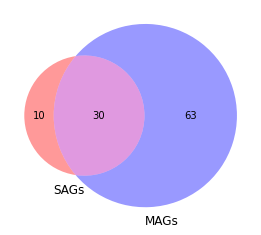

In [7]:
# later found out that one of the 30 orders in common is nan (don't know why considering I dropped NA) and another one is blank; so there are really 28 orders 
# in common

sags_clean = sags
sags_clean['order'] = sags['order'].dropna()
mags_clean = mags
mags_clean['order'] = mags['order'].dropna()


set_A = set(sags_clean['order'])
set_B = set(mags_clean['order'])

venn = venn2([set_A, set_B], ('SAGs', 'MAGs'),set_colors=('red', 'blue'))

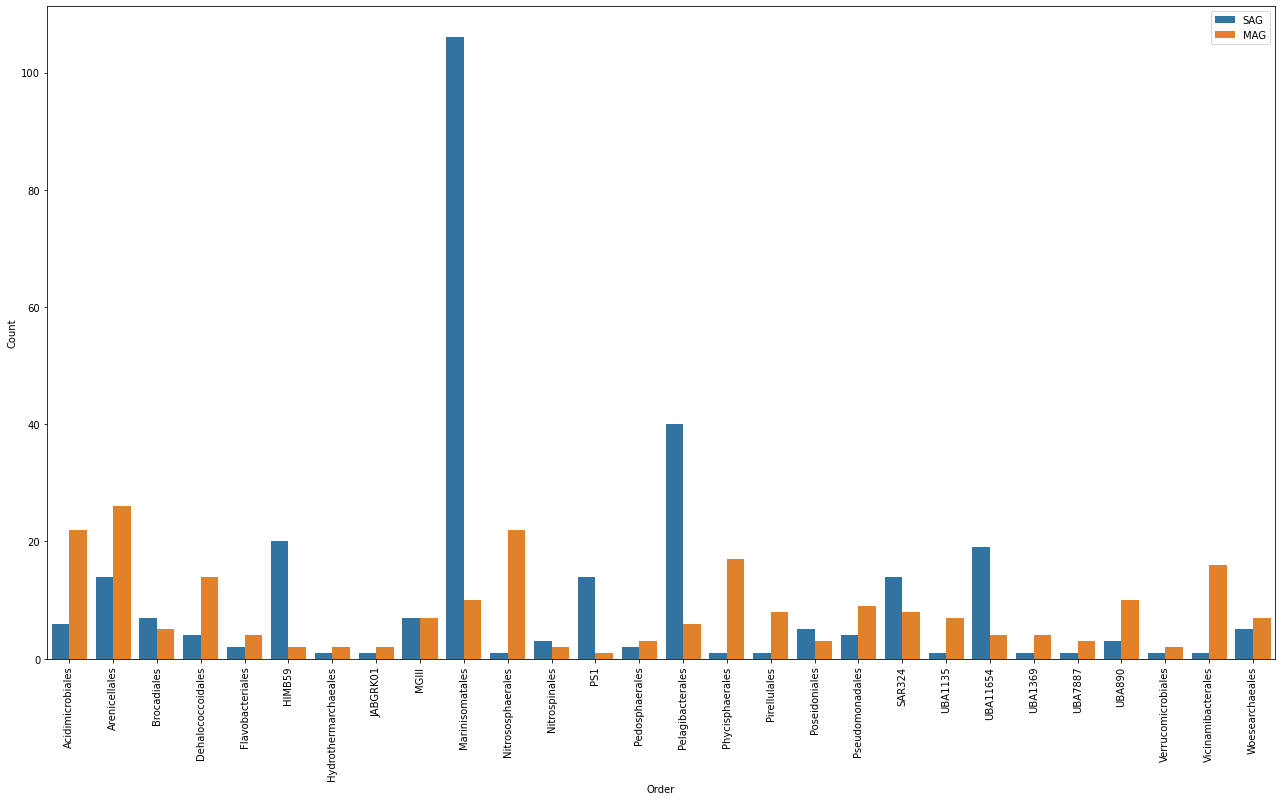

In [8]:
# run venn diagram with order names to get shared variable

sags_count = sags.groupby('order', as_index=False)['well'].count() [1:]
sags_count.rename(columns={'well': 'count'},inplace=True)
sags_count['type'] = 'SAG'

mags_count = mags.groupby('order', as_index=False)['user_genome'].count()
mags_count.rename(columns={'user_genome': 'count'},inplace=True)
mags_count['type'] = 'MAG'

combo = pd.concat([sags_count,mags_count])
combo_sub = combo[combo['order'].isin(shared)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22, 12))

sns.barplot(x="order", y="count", hue="type", data=combo_sub).tick_params(axis='x', rotation=90)
plt.xlabel('Order')
plt.ylabel('Count')
plt.legend(title='')